## SGDRegressor from scratch :
Objective :
1. Take the boston data set from sklearn.
2. Write the SGDRegressor from scratch.
3. You don’t need to split the data into train and test, you consider whole data for this
implementation.
4. Get weights( coefs_ and intercept ) from your model and the MSE value.
5. Don’t forget to standardize the data, and choose appropriate learning rate.
6. Train your model using SGDRegressor with the same parameters, and find the MSE on
the same data.
7. Compare these two results.
8. You can choose any other metric other than MSE to compare them. They both should be
same.

In [1]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#### Importing the boston data set from sklearn

In [2]:
boston = load_boston()
data = boston.data    
boston_df = pd.DataFrame(data)
X = boston_df
Y = boston.target

#### Standardize the whole data i.e in X

In [3]:
# Standardize the data the whole data i.e in X
scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)

## SGDRegressor for linear regression using sklearn i.e (using lib)

In [4]:
from sklearn import linear_model

clf = linear_model.SGDRegressor()
clf.fit(standardized_X,Y)

Y_pred = clf.predict(standardized_X)

C:\Users\nisha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


#### Optimal Weights and Intercept for sklearn SGD

In [6]:
from numpy import c_
print('Optimal Weights for sklearn SGD:\n')
print(c_[clf.coef_])

print('\nIntercept for sklearn SGD:',clf.intercept_)

Optimal Weights for sklearn SGD:

[[-0.61442494]
 [ 0.5774095 ]
 [-0.31853984]
 [ 0.77230556]
 [-0.95519373]
 [ 3.11821276]
 [-0.09202145]
 [-2.09440252]
 [ 0.92029227]
 [-0.47143219]
 [-1.79296117]
 [ 0.8881863 ]
 [-3.38749132]]

Intercept for sklearn SGD: [22.37249469]


### Graph for Predicted Y and actual Y

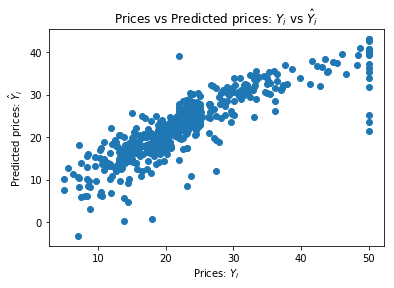

In [7]:
import matplotlib.pyplot as plt
plt.scatter(Y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

### Ploting Error for Actual Y and Predicted Y

Text(0.5,1,'Error plot for sklearn SGD')

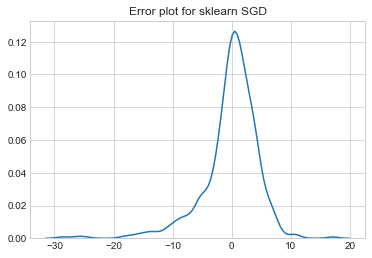

In [8]:
sns.set_style('whitegrid')
sns.kdeplot((Y_pred-Y))
plt.title("Error plot for sklearn SGD")

#### Computing MSE(Mean_square_error ) 

In [9]:
MSE_sklearn = mean_squared_error(Y, Y_pred)
print("MSE for SGD Sklearn ",MSE_sklearn)

MSE for SGD Sklearn  22.879567149030688


********************************* SGDRegressor sklearn END**********************************

## SGDRegressor for linear regression from scratch i.e (self implemented)

In [10]:
# SGDRegressor for linear regression from scratch which compututes optimal w and MSE 
def SGD_fun(X,y,weight,learning_rate=0.01,iterations=10):
    """Fun to compute the optimal weight and intercept"""
    m = len(y) #  length of the data set
    
    for it in range(iterations): # iteration 
        sum_error = 0
        
        for i in range(m):
            batch_size = np.random.randint(0,m)  # random batch size for every iteration i.e k batch_size 
            X_i = X[batch_size,:].reshape(1,X.shape[1])
            y_i = y[batch_size].reshape(1,1)
            prediction = np.dot(X_i,weight)
            
            #-------- error ---------
            error = prediction - y_i 
            sum_error += error**2
            #--------- error ---------
            
            weight = weight -(2/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
        
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (it, learning_rate, sum_error/m))
                
    return weight

def predict_fun(X_b,weight):
    """Fun to predict y using data x and weight"""
    y_pred = X_b.dot(weight)
    y_pred = y_pred.ravel()
    return y_pred   

### Implementing self build SGD Reg 

In [11]:
learning_rate =0.2 #learning_rate
n_iter = 100 #no. of iterations

weight = np.random.randn(14,1) #picking the initial random weight and intercept  

X_b = np.c_[np.ones((len(standardized_X),1)),standardized_X] 

optimal_weight = SGD_fun(X_b,Y,weight,learning_rate,n_iter) 

>epoch=0, lrate=0.200, error=372.950
>epoch=1, lrate=0.200, error=174.957
>epoch=2, lrate=0.200, error=83.048
>epoch=3, lrate=0.200, error=50.522
>epoch=4, lrate=0.200, error=34.327
>epoch=5, lrate=0.200, error=25.581
>epoch=6, lrate=0.200, error=28.041
>epoch=7, lrate=0.200, error=24.809
>epoch=8, lrate=0.200, error=24.826
>epoch=9, lrate=0.200, error=21.362
>epoch=10, lrate=0.200, error=22.387
>epoch=11, lrate=0.200, error=22.641
>epoch=12, lrate=0.200, error=18.995
>epoch=13, lrate=0.200, error=27.757
>epoch=14, lrate=0.200, error=22.292
>epoch=15, lrate=0.200, error=23.984
>epoch=16, lrate=0.200, error=24.211
>epoch=17, lrate=0.200, error=25.864
>epoch=18, lrate=0.200, error=25.489
>epoch=19, lrate=0.200, error=25.719
>epoch=20, lrate=0.200, error=24.534
>epoch=21, lrate=0.200, error=26.143
>epoch=22, lrate=0.200, error=25.490
>epoch=23, lrate=0.200, error=24.631
>epoch=24, lrate=0.200, error=25.324
>epoch=25, lrate=0.200, error=19.155
>epoch=26, lrate=0.200, error=18.068
>epoch=27

#### Optimal Weights and Intercept  for self implemented SGD

In [12]:
print('Optimal Weights for self implemented SGD:\n')
print(optimal_weight[1:])

print('\nIntercept for self implemented SGD:  {:f}'.format(optimal_weight[0][0]))

Optimal Weights for self implemented SGD:

[[-0.84840338]
 [ 0.96791634]
 [ 0.18891454]
 [ 0.90712094]
 [-1.81948175]
 [ 2.82908466]
 [-0.04310302]
 [-3.02864468]
 [ 2.33342662]
 [-1.79058631]
 [-2.18579026]
 [ 0.92323947]
 [-3.81332295]]

Intercept for self implemented SGD:  22.475441


#### Getting Predicted Y using optimal weight for data set X

In [13]:
y_predicted = predict_fun(X_b,optimal_weight)

### Graph for Predicted Y and actual Y (Self Implemented SGD)

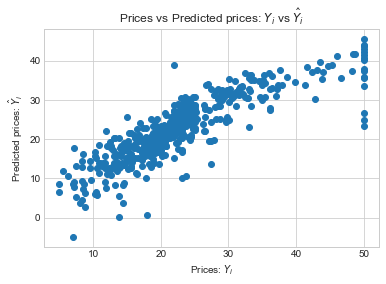

In [14]:
plt.scatter(Y, y_predicted)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

#### Ploting Error for Actual Y and Predicted Y

Text(0.5,1,'Error plot for self implemented SGD')

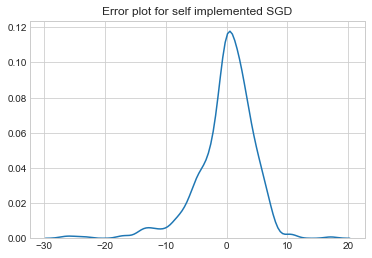

In [15]:
sns.set_style('whitegrid')
sns.kdeplot((y_predicted-Y))
plt.title("Error plot for self implemented SGD")

#### Computing MSE (Mean_square_error) for Self implemented SGD

In [16]:
print("Mean Squared Error using the predicted Y and optimal weights :",np.mean((Y-y_predicted)**2))

Mean Squared Error using the predicted Y and optimal weights : 22.0562556620678


*******************self build SGD Reg END************************

## Comparing Sklearn SGD and Self Implemented SGD

Text(0.5,1,'Error plot for Sklearn SGD and Self Implemented SGD')

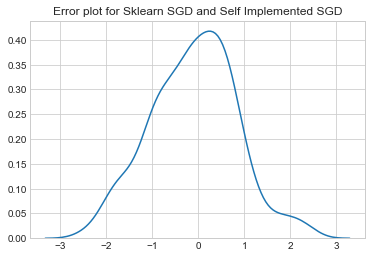

In [17]:
sklearn_pred = Y_pred 
self_pred = y_predicted
sns.set_style('whitegrid')
sns.kdeplot((sklearn_pred-self_pred))
plt.title("Error plot for Sklearn SGD and Self Implemented SGD")

### Getting optimal weight i.e (coef) for Self implemented SGD and sklearn SGD 

In [18]:
print("Sklearn SGD optimal Weight")
print(c_[clf.coef_])
print("\n Self implemented SGD optimal Weight")
print(optimal_weight[1:])

Sklearn SGD optimal Weight
[[-0.61442494]
 [ 0.5774095 ]
 [-0.31853984]
 [ 0.77230556]
 [-0.95519373]
 [ 3.11821276]
 [-0.09202145]
 [-2.09440252]
 [ 0.92029227]
 [-0.47143219]
 [-1.79296117]
 [ 0.8881863 ]
 [-3.38749132]]

 Self implemented SGD optimal Weight
[[-0.84840338]
 [ 0.96791634]
 [ 0.18891454]
 [ 0.90712094]
 [-1.81948175]
 [ 2.82908466]
 [-0.04310302]
 [-3.02864468]
 [ 2.33342662]
 [-1.79058631]
 [-2.18579026]
 [ 0.92323947]
 [-3.81332295]]


### Getting optimal Intercept for Self implemented SGD and sklearn SGD 

In [19]:
print("Sklearn SGD optimal intercept",clf.intercept_)
print("\nSelf implemented SGD optimal intercept",optimal_weight[0][0])


Sklearn SGD optimal intercept [22.37249469]

Self implemented SGD optimal intercept 22.47544070380813


### Conclusion 

1. As from above plot we can see that mean of the differences in the prediction of the two models i.e (self implemented and sklearn sgd) is at 0
2. As we can see above intercept and weight(coef) is almost same for sklearn SGD and self implemented sgd 


In [21]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["SGD","MSE"]

x.add_row(["Sklearn",22.879567149030688])
x.add_row(["Self",22.0562556620678])

print(x)

+---------+--------------------+
|   SGD   |        MSE         |
+---------+--------------------+
| Sklearn | 22.879567149030688 |
|   Self  |  22.0562556620678  |
+---------+--------------------+
